In [250]:
import pandas as pd
import subprocess
import os
import re
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np

In [2]:
df = pd.read_csv('../dataset/OpenPart.csv')
df.head()

,Case,Sample 1,Sample 2,Sample 3
0,00000072_000.png,1,5,1
1,00000150_002.png,5,5,3
2,00000181_061.png,4,4,3
3,00000211_019.png,4,4,2
4,00000211_041.png,3,5,2


In [64]:
'asdasd.png'[:-4]

'asdasd'

In [65]:
def rename_file(num):
    def fun(row):
        row[0] = f'dataset/sample_{num}/{row[0]}'
        row[0] = row[0].replace('.png', f'_s{num}.png')
        return row
    return fun

def rename_expert_file(file_name):
    file_name = 'dataset/Expert/' + file_name[:-4] + '_expert.png'
    return file_name

In [66]:
df_s1 = df.iloc[:,[0,1]]
df_s1 = df_s1.rename(columns={"Case": "pred_path", "Sample 1": "review"})
df_s1['pred_path'].apply(rename_expert_file)
df_s1['true_mask'] = df_s1['pred_path'].apply(rename_expert_file)
df_s1 = df_s1.apply(rename_file(1), axis=1)
df_s1 = df_s1[['true_mask', 'pred_path', 'review']]
df_s1

,true_mask,pred_path,review
0,dataset/Expert/00000072_000_expert.png,dataset/sample_1/00000072_000_s1.png,1
1,dataset/Expert/00000150_002_expert.png,dataset/sample_1/00000150_002_s1.png,5
2,dataset/Expert/00000181_061_expert.png,dataset/sample_1/00000181_061_s1.png,4
3,dataset/Expert/00000211_019_expert.png,dataset/sample_1/00000211_019_s1.png,4
4,dataset/Expert/00000211_041_expert.png,dataset/sample_1/00000211_041_s1.png,3
5,dataset/Expert/00000344_003_expert.png,dataset/sample_1/00000344_003_s1.png,2
6,dataset/Expert/00000468_033_expert.png,dataset/sample_1/00000468_033_s1.png,2
7,dataset/Expert/00000808_002_expert.png,dataset/sample_1/00000808_002_s1.png,2
8,dataset/Expert/00000830_000_expert.png,dataset/sample_1/00000830_000_s1.png,3
9,dataset/Expert/00000974_002_expert.png,dataset/sample_1/00000974_002_s1.png,1


In [67]:
df_s2 = df.iloc[:,[0,1]]
df_s2 = df_s2.rename(columns={"Case": "pred_path", "Sample 1": "review"})
df_s2['true_mask'] = df_s2['pred_path'].apply(rename_expert_file)
df_s2 = df_s2.apply(rename_file(2), axis=1)
df_s2 = df_s2[['true_mask', 'pred_path', 'review']]
df_s2

,true_mask,pred_path,review
0,dataset/Expert/00000072_000_expert.png,dataset/sample_2/00000072_000_s2.png,1
1,dataset/Expert/00000150_002_expert.png,dataset/sample_2/00000150_002_s2.png,5
2,dataset/Expert/00000181_061_expert.png,dataset/sample_2/00000181_061_s2.png,4
3,dataset/Expert/00000211_019_expert.png,dataset/sample_2/00000211_019_s2.png,4
4,dataset/Expert/00000211_041_expert.png,dataset/sample_2/00000211_041_s2.png,3
5,dataset/Expert/00000344_003_expert.png,dataset/sample_2/00000344_003_s2.png,2
6,dataset/Expert/00000468_033_expert.png,dataset/sample_2/00000468_033_s2.png,2
7,dataset/Expert/00000808_002_expert.png,dataset/sample_2/00000808_002_s2.png,2
8,dataset/Expert/00000830_000_expert.png,dataset/sample_2/00000830_000_s2.png,3
9,dataset/Expert/00000974_002_expert.png,dataset/sample_2/00000974_002_s2.png,1


In [68]:
df_s3 = df.iloc[:,[0,1]]
df_s3 = df_s3.rename(columns={"Case": "pred_path", "Sample 1": "review"})
df_s3['true_mask'] = df_s3['pred_path'].apply(rename_expert_file)
df_s3 = df_s3.apply(rename_file(3), axis=1)
df_s3 = df_s3[['true_mask', 'pred_path', 'review']]
df_s3

,true_mask,pred_path,review
0,dataset/Expert/00000072_000_expert.png,dataset/sample_3/00000072_000_s3.png,1
1,dataset/Expert/00000150_002_expert.png,dataset/sample_3/00000150_002_s3.png,5
2,dataset/Expert/00000181_061_expert.png,dataset/sample_3/00000181_061_s3.png,4
3,dataset/Expert/00000211_019_expert.png,dataset/sample_3/00000211_019_s3.png,4
4,dataset/Expert/00000211_041_expert.png,dataset/sample_3/00000211_041_s3.png,3
5,dataset/Expert/00000344_003_expert.png,dataset/sample_3/00000344_003_s3.png,2
6,dataset/Expert/00000468_033_expert.png,dataset/sample_3/00000468_033_s3.png,2
7,dataset/Expert/00000808_002_expert.png,dataset/sample_3/00000808_002_s3.png,2
8,dataset/Expert/00000830_000_expert.png,dataset/sample_3/00000830_000_s3.png,3
9,dataset/Expert/00000974_002_expert.png,dataset/sample_3/00000974_002_s3.png,1


In [69]:
type_dict = {
    'DICE': 'Similarity',
    'JACRD': 'Similarity',
    'AUC': 'Similarity',
    'KAPPA': 'Similarity',
    'RNDIND': 'Similarity',
    'ADJRIND': 'Similarity',
    'ICCORR': 'Similarity',
    'VOLSMTY': 'Similarity',
    'MUTINF': 'Similarity',
    'HDRFDST': 'Distance',
    'AVGDIST': 'Distance',
    'MAHLNBS': 'Distance',
    'VARINFO': 'Distance',
    'GCOERR': 'Distance',
    'PROBDST': 'Distance',
    'SNSVTY': 'Classic Measures',
    'SPCFTY': 'Classic Measures',
    'PRCISON': 'Classic Measures',
    'FMEASR': 'Classic Measures',
    'ACURCY': 'Classic Measures',
    'FALLOUT': 'Classic Measures',
    'TP': 'Classic Measures',
    'FP': 'Classic Measures',
    'TN': 'Classic Measures',
    'FN': 'Classic Measures',
    'REFVOL': 'Classic Measures',
    'SEGVOL': 'Classic Measures',
}

In [292]:
new_df = pd.concat([df_s1, df_s2, df_s3]).reset_index(drop=True)

new_df['true_mask_pixels'] = 0
new_df['pred_mask_pixels'] = 0

for t in type_dict:
    new_df[t] = 0

In [293]:
def calculate(true_mask, pred_path, debug=False):    
    cmd_metrics = 'DICE,JACRD,AUC,KAPPA,RNDIND,ADJRIND,ICCORR,VOLSMTY,MUTINF,MAHLNBS,HDRFDST,VARINFO,GCOERR,PROBDST,SNSVTY,SPCFTY,PRCISON,FMEASR,ACURCY,FALLOUT,TP,FP,TN,FN,REFVOL,SEGVOL'
    
    metrics = subprocess.run(['./evaluate',
                              true_mask,
                              pred_path,
                             '-use', cmd_metrics],
                              cwd=os.path.realpath(os.path.join(os.getcwd(), '..')),
                              capture_output=True)
    
    metrics = metrics.stdout.decode("utf-8").strip()
    if debug:
        print(metrics)
    metrics = re.findall(r"([A-Z]+)\s+=\s([\.\d]+)\s+[\w\(\)\-,\s]+\s?$",
                         metrics, re.MULTILINE)
    
    return metrics

In [294]:
def is_img_empty(path):
    img = Image.open(f'../{path}').convert('L')
    np_img = np.array(img)
    np_img[np_img > 0] = 1
#     result = not bool(np.count_nonzero(np_img))
#     result = int(result)
    return np.count_nonzero(np_img)

In [295]:
for i in tqdm(new_df.index, ncols='100%'):
    true_mask = new_df.loc[i, ['true_mask']][0]
    pred_path = new_df.loc[i, ['pred_path']][0]
    metrics = calculate(true_mask, pred_path)
    
    for metric_name, value in metrics:
        new_df.loc[i,[metric_name]] = value
        
    new_df.loc[i,['true_mask_pixels']] = is_img_empty(true_mask)
    new_df.loc[i,['pred_mask_pixels']] = is_img_empty(pred_path)
    

In [297]:
new_df.to_csv('calculeted_metrics_fast_v4.csv')

In [472]:
new_df

,true_mask,pred_path,review,true_mask_pixels,pred_mask_pixels,DICE,JACRD,AUC,KAPPA,RNDIND,...,PRCISON,FMEASR,ACURCY,FALLOUT,TP,FP,TN,FN,REFVOL,SEGVOL
0,dataset/Expert/00000072_000_expert.png,dataset/sample_1/00000072_000_s1.png,1,0,2121,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,dataset/Expert/00000150_002_expert.png,dataset/sample_1/00000150_002_s1.png,5,2729,959,0.520065,0.351411,0.675705,0.519415,0.996630,...,1.000000,0.520065,0.998312,0.000000,959,0,1045847,1770,2729,959
2,dataset/Expert/00000181_061_expert.png,dataset/sample_1/00000181_061_s1.png,4,62059,173279,0.519559,0.350949,0.935726,0.473689,0.807597,...,0.352818,0.519559,0.892172,0.113676,61136,112143,874374,923,62059,173279
3,dataset/Expert/00000211_019_expert.png,dataset/sample_1/00000211_019_s1.png,4,138819,251580,0.708670,0.548791,0.936005,0.648735,0.806597,...,0.549853,0.708670,0.891534,0.124482,138332,113248,796509,487,138819,251580
4,dataset/Expert/00000211_041_expert.png,dataset/sample_1/00000211_041_s1.png,3,124276,285638,0.562957,0.391747,0.872117,0.476487,0.716678,...,0.403945,0.562957,0.829149,0.184200,115382,170256,754044,8894,124276,285638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,dataset/Expert/00011237_006_expert.png,dataset/sample_3/00011237_006_s3.png,3,39847,70040,0.519079,0.350511,0.837288,0.494596,0.904282,...,0.407196,0.519079,0.949601,0.041161,28520,41520,967209,11327,39847,70040
176,dataset/Expert/00011269_019_expert.png,dataset/sample_3/00011269_019_s3.png,1,3351,60618,0.000000,0.000000,0.471002,0,0.885432,...,0.000000,0.000000,0.938994,0.057995,0,60618,984607,3351,3351,60618
177,dataset/Expert/00011355_011_expert.png,dataset/sample_3/00011355_011_s3.png,4,39493,195195,0.304123,0.179331,0.872778,0.257612,0.737018,...,0.182827,0.304123,0.844252,0.158072,35687,159508,849575,3806,39493,195195
178,dataset/Expert/00011450_000_expert.png,dataset/sample_3/00011450_000_s3.png,4,49848,9603,0.315453,0.187263,0.593943,0.304776,0.925389,...,0.976466,0.315453,0.961188,0.000226,9377,226,998502,40471,49848,9603


In [299]:
mistakes = new_df[(new_df['review'] == 5) & (new_df['true_mask_pixels'] == 0) & (new_df['pred_mask_pixels'] != 0)]
mistakes[['true_mask', 'pred_path', 'review', 'true_mask_pixels', 'pred_mask_pixels']]

,true_mask,pred_path,review,true_mask_pixels,pred_mask_pixels
75,dataset/Expert/00002597_000_expert.png,dataset/sample_2/00002597_000_s2.png,5,0,2020
91,dataset/Expert/00005215_000_expert.png,dataset/sample_2/00005215_000_s2.png,5,0,3363
119,dataset/Expert/00011502_001_expert.png,dataset/sample_2/00011502_001_s2.png,5,0,156024
179,dataset/Expert/00011502_001_expert.png,dataset/sample_3/00011502_001_s3.png,5,0,140561


In [300]:
new_df[(new_df['true_mask_pixels'] != 0) & (new_df['pred_mask_pixels'] != 0)]

,true_mask,pred_path,review,true_mask_pixels,pred_mask_pixels,DICE,JACRD,AUC,KAPPA,RNDIND,...,PRCISON,FMEASR,ACURCY,FALLOUT,TP,FP,TN,FN,REFVOL,SEGVOL
1,dataset/Expert/00000150_002_expert.png,dataset/sample_1/00000150_002_s1.png,5,2729,959,0.520065,0.351411,0.675705,0.519415,0.996630,...,1.000000,0.520065,0.998312,0.000000,959,0,1045847,1770,2729,959
2,dataset/Expert/00000181_061_expert.png,dataset/sample_1/00000181_061_s1.png,4,62059,173279,0.519559,0.350949,0.935726,0.473689,0.807597,...,0.352818,0.519559,0.892172,0.113676,61136,112143,874374,923,62059,173279
3,dataset/Expert/00000211_019_expert.png,dataset/sample_1/00000211_019_s1.png,4,138819,251580,0.708670,0.548791,0.936005,0.648735,0.806597,...,0.549853,0.708670,0.891534,0.124482,138332,113248,796509,487,138819,251580
4,dataset/Expert/00000211_041_expert.png,dataset/sample_1/00000211_041_s1.png,3,124276,285638,0.562957,0.391747,0.872117,0.476487,0.716678,...,0.403945,0.562957,0.829149,0.184200,115382,170256,754044,8894,124276,285638
5,dataset/Expert/00000344_003_expert.png,dataset/sample_1/00000344_003_s1.png,2,30639,249968,0.169319,0.092489,0.776563,0.123700,0.654238,...,0.095036,0.169319,0.777703,0.222226,23756,226212,791725,6883,30639,249968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,dataset/Expert/00011157_001_expert.png,dataset/sample_3/00011157_001_s3.png,4,58774,15494,0.338908,0.204027,0.605593,0.323076,0.910738,...,0.812250,0.338908,0.953176,0.002939,12585,2909,986893,46189,58774,15494
175,dataset/Expert/00011237_006_expert.png,dataset/sample_3/00011237_006_s3.png,3,39847,70040,0.519079,0.350511,0.837288,0.494596,0.904282,...,0.407196,0.519079,0.949601,0.041161,28520,41520,967209,11327,39847,70040
176,dataset/Expert/00011269_019_expert.png,dataset/sample_3/00011269_019_s3.png,1,3351,60618,0.000000,0.000000,0.471002,0,0.885432,...,0.000000,0.000000,0.938994,0.057995,0,60618,984607,3351,3351,60618
177,dataset/Expert/00011355_011_expert.png,dataset/sample_3/00011355_011_s3.png,4,39493,195195,0.304123,0.179331,0.872778,0.257612,0.737018,...,0.182827,0.304123,0.844252,0.158072,35687,159508,849575,3806,39493,195195


In [301]:
from sklearn.model_selection import train_test_split
from catboost.utils import eval_metric
from catboost import CatBoostRegressor, Pool

<AxesSubplot:>

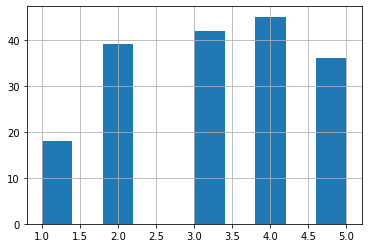

In [302]:
new_df['review'].hist()

Int64Index([75, 91, 119, 179], dtype='int64')

In [386]:
results = []
for _ in range(20):
    target = 'review'
    # features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
    #             'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
    #             'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
    #             'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

    features = ['true_mask_pixels', 'pred_mask_pixels']

    df = new_df[features + [target]]
    # df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7)

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint loss\t', np.mean(results))
print('mae_rint max\t', np.amax(results))
print('mae_rint min\t', np.amin(results))

mae_rint loss	 0.7772721590909092
mae_rint max	 0.9090903454545457
mae_rint min	 0.563635909090909


In [387]:
results = []
for _ in range(20):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
                'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

#     features = ['true_mask_pixels', 'pred_mask_pixels']

    df = new_df[features + [target]]
    # df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7)

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint loss\t', np.mean(results))
print('mae_rint max\t', np.amax(results))
print('mae_rint min\t', np.amin(results))

mae_rint loss	 0.8445448263636367
mae_rint max	 0.9999992909090916
mae_rint min	 0.654544909090909


In [388]:
results = []
for _ in range(20):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
                'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

#     features = ['true_mask_pixels', 'pred_mask_pixels']

    df = new_df[features + [target]]
    df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7)

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint loss\t', np.mean(results))
print('mae_rint max\t', np.amax(results))
print('mae_rint min\t', np.amin(results))

mae_rint loss	 0.8452823971698116
mae_rint max	 0.9622635849056609
mae_rint min	 0.6226409999999998


In [389]:
results = []
for _ in range(20):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST']

    df = new_df[features + [target]]
#     df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7)

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint loss\t', np.mean(results))
print('mae_rint max\t', np.amax(results))
print('mae_rint min\t', np.amin(results))

mae_rint loss	 0.8354539354545458
mae_rint max	 1.0181811636363645
mae_rint min	 0.5090904545454544


In [391]:
results = []
for _ in range(20):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST']

    df = new_df[features + [target]]
#     df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint loss	 0.801817591818182
mae_rint max	 0.9090903090909096
mae_rint min	 0.6909085454545455


In [400]:
results = []
for _ in range(20):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST']

    df = new_df[features + [target]]
#     df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.9, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 0.9999993333333337
mae_rint loss	 0.7499994444444446
mae_rint min	 0.5555551111111111


In [404]:
results = []
for _ in range(100):
    target = 'review'
    # features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
    #             'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
    #             'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
    #             'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

    features = ['true_mask_pixels', 'pred_mask_pixels', 'JACRD']

    df = new_df[features + [target]]
    # df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 0.9272721090909096
mae_rint loss	 0.7261812761818185
mae_rint min	 0.5272722545454545


In [406]:
results = []
for _ in range(100):
    target = 'review'
    # features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
    #             'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
    #             'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
    #             'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

    features = ['true_mask_pixels', 'pred_mask_pixels', 'JACRD', 'DICE']

    df = new_df[features + [target]]
    # df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 1.0181811818181823
mae_rint loss	 0.7599994441818183
mae_rint min	 0.545454109090909


In [405]:
results = []
for _ in range(100):
    target = 'review'
    # features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
    #             'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
    #             'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
    #             'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

    features = ['true_mask_pixels', 'pred_mask_pixels']

    df = new_df[features + [target]]
    # df = df.drop(index=mistakes.index)
    df_train, df_test = train_test_split(df, train_size=0.7, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 0.963635745454546
mae_rint loss	 0.7398176281818184
mae_rint min	 0.47272690909090903


In [212]:
# cb_mae.save_model('../models/cb_mae_v1-0.866.py',
#                    format="python",
#                    pool=df_train)

In [154]:
cb_mae_pred

array([4., 3., 2., 3., 3., 3., 1., 3., 2., 2., 3., 3., 3., 2., 5., 5., 3.,
       2., 4., 3., 3., 3., 4., 4., 3., 3., 3., 4., 3., 3., 3., 4., 2., 3.,
       3., 2., 3., 2., 3., 3., 5., 3., 4., 3., 4.])

In [196]:
import shap

In [197]:
shap.initjs()

In [409]:
results = []
models = []
for _ in range(1):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'JACRD', 'AUC', 'KAPPA', 'RNDIND', 
                'ADJRIND', 'ICCORR', 'VOLSMTY', 'MUTINF', 'HDRFDST', 'AVGDIST', 'MAHLNBS',
                'VARINFO', 'GCOERR', 'PROBDST', 'SNSVTY', 'SPCFTY', 'PRCISON', 'FMEASR', 'ACURCY',
                'FALLOUT', 'TP', 'FP', 'TN', 'FN', 'REFVOL', 'SEGVOL']

    df = new_df[features + [target]]
    df_train, df_test = train_test_split(df, train_size=0.7, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    models.append(cb_mae)    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 1.0545446909090916
mae_rint loss	 0.818363026727273
mae_rint min	 0.6545448363636364


In [446]:
results = []
models = []
for _ in range(100):
    target = 'review'
    features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'TP', 'FP', 'REFVOL', 'MUTINF']

    df = new_df[features + [target]]
    df_train, df_test = train_test_split(df, train_size=0.6, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    models.append(cb_mae)    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))

mae_rint max	 1.0138881805555564
mae_rint loss	 0.7880549773611115
mae_rint min	 0.5694439861111112


In [450]:
from matplotlib import pyplot as plt

In [462]:
np.reshape(results, (1, -1))[0]

array([0.87499932, 0.77777719, 0.83333275, 0.69444386, 0.73611057,
       0.83333274, 0.74999943, 0.65277731, 0.73611058, 0.74999942,
       0.56944399, 0.76388831, 0.77777724, 0.93055485, 0.87499935,
       0.69444392, 0.73611061, 0.7916661 , 0.84722164, 0.93055488,
       0.77777725, 0.86111047, 0.73611054, 0.74999947, 0.86111053,
       0.84722167, 0.66666611, 0.88888822, 0.69444389, 0.62499951,
       0.72222167, 0.7361105 , 0.90277713, 0.91666604, 0.87499938,
       0.70833282, 0.66666615, 0.88888828, 0.77777722, 0.94444376,
       0.87499929, 1.01388818, 0.76388828, 0.88888828, 0.76388826,
       0.79166613, 0.95833268, 0.70833279, 0.94444379, 0.83333268,
       0.74999947, 0.77777719, 0.79166606, 0.84722161, 0.86111049,
       0.86111049, 0.73611056, 0.69444393, 0.77777714, 0.73611058,
       0.68055507, 0.79166608, 0.83333275, 0.77777721, 0.73611051,
       0.80555493, 0.95833271, 0.76388833, 0.73611061, 0.69444392,
       0.73611061, 0.77777724, 0.81944382, 0.74999947, 0.74999

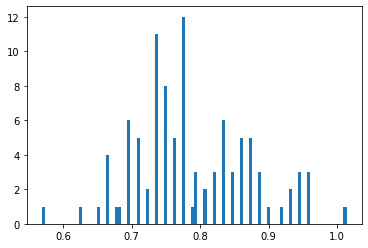

In [467]:
plt.hist(np.reshape(results, (1, -1))[0], bins=100)
plt.show()

In [447]:
model_min = models[np.argmin(results)]
model_max = models[np.argmax(results)]

In [448]:
explainer = shap.TreeExplainer(model_min)
shap_values = explainer.shap_values(df[features])
shap.force_plot(explainer.expected_value, shap_values[:,:], df[features].iloc[:,:])

In [449]:
explainer = shap.TreeExplainer(model_maxmodel)
shap_values = explainer.shap_values(df[features])
shap.force_plot(explainer.expected_value, shap_values[:,:], df[features].iloc[:,:])

In [422]:
features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'TP', 'FP', 'REFVOL', 'MUTINF']

# refovl
# Dice
# mutinf
# hdrfst
# volsmity
# fmeasr
# spcfty

# ft
# tp
# iccor
# mahlbns

In [474]:
df = new_df[features + [target]]
df

,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
1,2729,959,0.520065,959,0,2729,0.008117,5
2,62059,173279,0.519559,61136,112143,62059,0.159455,4
3,138819,251580,0.708670,138332,113248,138819,0.320121,4
4,124276,285638,0.562957,115382,170256,124276,0.193338,3
...,...,...,...,...,...,...,...,...
175,39847,70040,0.519079,28520,41520,39847,0.082943,3
176,3351,60618,0.000000,0,60618,3351,0.000275,1
177,39493,195195,0.304123,35687,159508,39493,0.070164,4
178,49848,9603,0.315453,9377,226,49848,0.039080,4


In [475]:
df[(df['review'] == 5) & (df['true_mask_pixels'] == 0) & (df['pred_mask_pixels'] != 0)]

,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
75,0,2020,0,0,0,0,0,5
91,0,3363,0,0,0,0,0,5
119,0,156024,0,0,0,0,0,5
179,0,140561,0,0,0,0,0,5


In [492]:
results = []
models = []

target = 'review'
features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'TP', 'FP', 'REFVOL', 'MUTINF']

df = new_df[features + [target]]
df.loc[mistakes.index, target] = 1

for _ in tqdm(range(100)):
    df_train, df_test = train_test_split(df, train_size=0.6, stratify=df[target])

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    models.append(cb_mae)    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



mae_rint max	 1.0138881944444451
mae_rint loss	 0.8018049716666674
mae_rint min	 0.5277773055555556


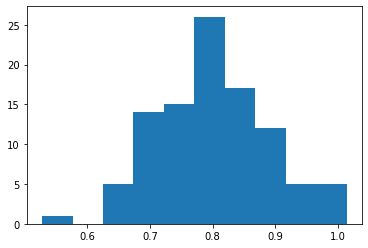

In [494]:
plt.hist(np.reshape(results, (1, -1))[0], bins=10)
plt.show()

In [612]:
rand_review = np.random.randint(1, 6)
parents = df[df['review'] == rand_review].sample(2)
parents

,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
39,6715,115727,0.042126,2579,113148,6715,0.002355,2
127,20972,38304,0.501856,14874,23430,20972,0.055002,2


In [616]:
rand_review = np.random.randint(1, 6)
parents = df[df['review'] == rand_review].sample(2)

cross = [0, 0]
cross.extend(np.random.randint(2, size=5))

childs = {}

for i, feature in enumerate(features):
    childs[feature] = [
        parents.iloc[cross[i]][feature],
        parents.iloc[int(cross[i] != 1)][feature],
    ]

childs['review'] = [rand_review, rand_review]

childs = pd.DataFrame(data=childs)

[0, 0, 1, 0, 0, 0, 1]


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,6715,115727,0.501856,2579,113148,6715,0.055002,2
1,20972,38304,0.042126,14874,23430,20972,0.002355,2


In [683]:
p_test = df[df['review'] == rand_review].sample(2)
display(p_test)

parents_contain_zeroes = np.any(p_test.iloc[:,:2].to_numpy() == 0)
print(parents_contain_zeroes)

,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
153,32216,0,0,0,0,0,0,2


True


In [684]:
def augment_data(df, n_iter=60):
    i = 0
    childs = []
    while i <= n_iter:
        rand_review = np.random.randint(1, 6)
        parents = df[df['review'] == rand_review].sample(2)
        
        parents_contain_zeroes = np.any(parents.iloc[:,:2].to_numpy() == 0)
        
        if parents_contain_zeroes:
            display(parents)
            continue

        cross = [0, 0]
        cross.extend(np.random.randint(2, size=5))

        childs_dict = {}

        for i, feature in enumerate(features):
            childs_dict[feature] = [
                parents.iloc[cross[i]][feature],
                parents.iloc[int(cross[i] != 1)][feature],
            ]

        childs_dict['review'] = [rand_review, rand_review]
        
        if isinstance(childs, list):
            childs = pd.DataFrame(data=childs_dict)
        else:
            childs = pd.concat([
                childs,
                pd.DataFrame(data=childs_dict)
            ])
        i += 1
        print(i)
    return pd.concat([df, childs]).reset_index(drop=True).sample(frac=1)

In [685]:
results = []
models = []

target = 'review'
features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'TP', 'FP', 'REFVOL', 'MUTINF']

df = new_df[features + [target]]
df.loc[mistakes.index, target] = 1

df_train, df_test = train_test_split(df, train_size=0.5, stratify=df[target])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
augment_data(df_train)

7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
44,28884,35307,0.697512,22387,12920,28884,0.095979,5


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
156,12863,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
46,36058,28893,0.846731,27498,1395,36058,0.140225,5
151,0,0,0,0,0,0,0,5


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
144,66390,55418,0.477456,29079,26339,66390,0.068888,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
84,66390,7440,0.141135,5210,2230,66390,0.013988,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
72,13134,13114,0.703444,9232,3882,13134,0.050824,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
67,20972,12054,0.286865,4737,7317,20972,0.015326,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
170,49307,164160,0.369490,39437,124723,49307,0.074534,3


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
132,13134,13261,0.700360,9243,4018,13134,0.050678,5


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
146,108108,128480,0.856527,101322,27158,108108,0.332430,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
131,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
51,56672,57089,0.440942,25081,32008,56672,0.056920,3
110,49307,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
86,108108,197160,0.708283,108108,89052,108108,0.291988,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
70,54921,26460,0.506457,20608,5852,54921,0.070529,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
165,31191,44370,0.808062,30529,13841,31191,0.147646,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
67,20972,12054,0.286865,4737,7317,20972,0.015326,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
61,2729,7540,0.469374,2410,5130,2729,0.015605,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
53,17665,180503,0.144322,14300,166203,17665,0.024260,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
12,13134,13016,0.866004,11323,1693,13134,0.071875,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
110,49307,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
113,17665,18525,0.829014,15001,3524,17665,0.085451,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
20,93912,53377,0.557041,41023,12354,93912,0.110918,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
170,49307,164160,0.369490,39437,124723,49307,0.074534,3


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
12,13134,13016,0.866004,11323,1693,13134,0.071875,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
0,0,2121,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
51,56672,57089,0.440942,25081,32008,56672,0.056920,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
72,13134,13114,0.703444,9232,3882,13134,0.050824,5
151,0,0,0,0,0,0,0,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
143,34614,80726,0.049419,2850,77876,34614,0.000010,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
125,30639,22077,0.007891,208,21869,30639,0.000288,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
168,57511,1974,0.000000,0,1974,57511,0.000153,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
68,4889,8554,0.455999,3065,5489,4889,0.016709,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
44,28884,35307,0.697512,22387,12920,28884,0.095979,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
171,56672,53820,0.473699,26170,27650,56672,0.064488,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
84,66390,7440,0.141135,5210,2230,66390,0.013988,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
170,49307,164160,0.369490,39437,124723,49307,0.074534,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
47,16356,28159,0.178007,3962,24197,16356,0.008054,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
71,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
143,34614,80726,0.049419,2850,77876,34614,0.000010,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
171,56672,53820,0.473699,26170,27650,56672,0.064488,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
132,13134,13261,0.700360,9243,4018,13134,0.050678,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
12,13134,13016,0.866004,11323,1693,13134,0.071875,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
144,66390,55418,0.477456,29079,26339,66390,0.068888,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
70,54921,26460,0.506457,20608,5852,54921,0.070529,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
167,16356,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
71,52405,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
100,52810,4740,0.130182,3746,994,52810,0.012297,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
72,13134,13114,0.703444,9232,3882,13134,0.050824,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
67,20972,12054,0.286865,4737,7317,20972,0.015326,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
167,16356,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
64,124276,208728,0.354296,58991,149737,124276,0.038410,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
53,17665,180503,0.144322,14300,166203,17665,0.024260,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
165,31191,44370,0.808062,30529,13841,31191,0.147646,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
111,56672,33489,0.644580,29058,4431,56672,0.110926,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
140,93912,174926,0.623818,83853,91073,93912,0.192843,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
171,56672,53820,0.473699,26170,27650,56672,0.064488,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
49,90200,124550,0.605476,65013,59537,90200,0.145420,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
171,56672,53820,0.473699,26170,27650,56672,0.064488,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
70,54921,26460,0.506457,20608,5852,54921,0.070529,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
61,2729,7540,0.469374,2410,5130,2729,0.015605,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
156,12863,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
12,13134,13016,0.866004,11323,1693,13134,0.071875,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
51,56672,57089,0.440942,25081,32008,56672,0.056920,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
47,16356,28159,0.178007,3962,24197,16356,0.008054,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
143,34614,80726,0.049419,2850,77876,34614,0.000010,3
156,12863,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
61,2729,7540,0.469374,2410,5130,2729,0.015605,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
165,31191,44370,0.808062,30529,13841,31191,0.147646,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
44,28884,35307,0.697512,22387,12920,28884,0.095979,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
61,2729,7540,0.469374,2410,5130,2729,0.015605,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
64,124276,208728,0.354296,58991,149737,124276,0.038410,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
156,12863,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
100,52810,4740,0.130182,3746,994,52810,0.012297,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
106,36058,34518,0.828384,29232,5286,36058,0.139280,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
68,4889,8554,0.455999,3065,5489,4889,0.016709,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
125,30639,22077,0.007891,208,21869,30639,0.000288,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
146,108108,128480,0.856527,101322,27158,108108,0.332430,5
151,0,0,0,0,0,0,0,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
140,93912,174926,0.623818,83853,91073,93912,0.192843,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
12,13134,13016,0.866004,11323,1693,13134,0.071875,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
146,108108,128480,0.856527,101322,27158,108108,0.332430,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
61,2729,7540,0.469374,2410,5130,2729,0.015605,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
68,4889,8554,0.455999,3065,5489,4889,0.016709,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
71,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
77,210024,141798,0.613793,107973,33825,210024,0.176429,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
156,12863,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
167,16356,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
22,71951,109967,0.678514,61717,48250,71951,0.179380,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
84,66390,7440,0.141135,5210,2230,66390,0.013988,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
44,28884,35307,0.697512,22387,12920,28884,0.095979,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
144,66390,55418,0.477456,29079,26339,66390,0.068888,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
61,2729,7540,0.469374,2410,5130,2729,0.015605,5
151,0,0,0,0,0,0,0,5


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
0,0,2121,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
84,66390,7440,0.141135,5210,2230,66390,0.013988,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
47,16356,28159,0.178007,3962,24197,16356,0.008054,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
72,13134,13114,0.703444,9232,3882,13134,0.050824,5


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
51,56672,57089,0.440942,25081,32008,56672,0.056920,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
169,90200,187162,0.552044,76558,110604,90200,0.152414,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
25,20247,48993,0.542288,18774,30219,20247,0.077437,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
77,210024,141798,0.613793,107973,33825,210024,0.176429,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
132,13134,13261,0.700360,9243,4018,13134,0.050678,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
25,20247,48993,0.542288,18774,30219,20247,0.077437,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
25,20247,48993,0.542288,18774,30219,20247,0.077437,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
12,13134,13016,0.866004,11323,1693,13134,0.071875,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
47,16356,28159,0.178007,3962,24197,16356,0.008054,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
170,49307,164160,0.369490,39437,124723,49307,0.074534,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
125,30639,22077,0.007891,208,21869,30639,0.000288,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
140,93912,174926,0.623818,83853,91073,93912,0.192843,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
51,56672,57089,0.440942,25081,32008,56672,0.056920,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
132,13134,13261,0.700360,9243,4018,13134,0.050678,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
167,16356,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
25,20247,48993,0.542288,18774,30219,20247,0.077437,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
156,12863,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
168,57511,1974,0.000000,0,1974,57511,0.000153,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
170,49307,164160,0.369490,39437,124723,49307,0.074534,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
106,36058,34518,0.828384,29232,5286,36058,0.139280,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
143,34614,80726,0.049419,2850,77876,34614,0.000010,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
113,17665,18525,0.829014,15001,3524,17665,0.085451,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
25,20247,48993,0.542288,18774,30219,20247,0.077437,3
156,12863,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
49,90200,124550,0.605476,65013,59537,90200,0.145420,3


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
64,124276,208728,0.354296,58991,149737,124276,0.038410,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
131,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
46,36058,28893,0.846731,27498,1395,36058,0.140225,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
25,20247,48993,0.542288,18774,30219,20247,0.077437,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
46,36058,28893,0.846731,27498,1395,36058,0.140225,5
151,0,0,0,0,0,0,0,5


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
70,54921,26460,0.506457,20608,5852,54921,0.070529,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
168,57511,1974,0.000000,0,1974,57511,0.000153,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
70,54921,26460,0.506457,20608,5852,54921,0.070529,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
170,49307,164160,0.369490,39437,124723,49307,0.074534,3
110,49307,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
170,49307,164160,0.369490,39437,124723,49307,0.074534,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
64,124276,208728,0.354296,58991,149737,124276,0.038410,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
25,20247,48993,0.542288,18774,30219,20247,0.077437,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
145,20247,20280,0.826609,16750,3530,20247,0.092495,3
110,49307,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
38,68865,17725,0.199030,8617,9108,68865,0.016866,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
84,66390,7440,0.141135,5210,2230,66390,0.013988,3


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
20,93912,53377,0.557041,41023,12354,93912,0.110918,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
169,90200,187162,0.552044,76558,110604,90200,0.152414,3


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
77,210024,141798,0.613793,107973,33825,210024,0.176429,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
131,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
68,4889,8554,0.455999,3065,5489,4889,0.016709,3


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
25,20247,48993,0.542288,18774,30219,20247,0.077437,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
72,13134,13114,0.703444,9232,3882,13134,0.050824,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
166,36058,12426,0.459038,11128,1298,36058,0.048488,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
67,20972,12054,0.286865,4737,7317,20972,0.015326,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
171,56672,53820,0.473699,26170,27650,56672,0.064488,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
67,20972,12054,0.286865,4737,7317,20972,0.015326,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
165,31191,44370,0.808062,30529,13841,31191,0.147646,3


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
38,68865,17725,0.199030,8617,9108,68865,0.016866,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
110,49307,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
64,124276,208728,0.354296,58991,149737,124276,0.038410,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
166,36058,12426,0.459038,11128,1298,36058,0.048488,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
12,13134,13016,0.866004,11323,1693,13134,0.071875,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
106,36058,34518,0.828384,29232,5286,36058,0.139280,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
47,16356,28159,0.178007,3962,24197,16356,0.008054,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
125,30639,22077,0.007891,208,21869,30639,0.000288,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
170,49307,164160,0.369490,39437,124723,49307,0.074534,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
84,66390,7440,0.141135,5210,2230,66390,0.013988,3
110,49307,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
113,17665,18525,0.829014,15001,3524,17665,0.085451,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
100,52810,4740,0.130182,3746,994,52810,0.012297,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
53,17665,180503,0.144322,14300,166203,17665,0.024260,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
20,93912,53377,0.557041,41023,12354,93912,0.110918,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
8,4889,22525,0.243452,3337,19188,4889,0.013820,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
65,30639,113456,0.414088,29834,83622,30639,0.091606,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
38,68865,17725,0.199030,8617,9108,68865,0.016866,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
167,16356,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
44,28884,35307,0.697512,22387,12920,28884,0.095979,5
151,0,0,0,0,0,0,0,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
131,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
132,13134,13261,0.700360,9243,4018,13134,0.050678,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
111,56672,33489,0.644580,29058,4431,56672,0.110926,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
61,2729,7540,0.469374,2410,5130,2729,0.015605,5
151,0,0,0,0,0,0,0,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
100,52810,4740,0.130182,3746,994,52810,0.012297,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
53,17665,180503,0.144322,14300,166203,17665,0.024260,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
71,52405,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
131,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
165,31191,44370,0.808062,30529,13841,31191,0.147646,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
21,148573,142237,0.372862,54216,88021,148573,0.042064,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
125,30639,22077,0.007891,208,21869,30639,0.000288,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
140,93912,174926,0.623818,83853,91073,93912,0.192843,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
131,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
51,56672,57089,0.440942,25081,32008,56672,0.056920,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
140,93912,174926,0.623818,83853,91073,93912,0.192843,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
6,5520,25900,0.244048,3834,22066,5520,0.015300,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
38,68865,17725,0.199030,8617,9108,68865,0.016866,2


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
64,124276,208728,0.354296,58991,149737,124276,0.038410,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
165,31191,44370,0.808062,30529,13841,31191,0.147646,3
110,49307,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
21,148573,142237,0.372862,54216,88021,148573,0.042064,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
77,210024,141798,0.613793,107973,33825,210024,0.176429,5
151,0,0,0,0,0,0,0,5


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
132,13134,13261,0.700360,9243,4018,13134,0.050678,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
156,12863,0,0,0,0,0,0,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
12,13134,13016,0.866004,11323,1693,13134,0.071875,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
68,4889,8554,0.455999,3065,5489,4889,0.016709,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
140,93912,174926,0.623818,83853,91073,93912,0.192843,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
136,24489,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
132,13134,13261,0.700360,9243,4018,13134,0.050678,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
95,144984,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
136,24489,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
41,30794,97005,0.359299,22959,74046,30794,0.055701,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
81,148573,93860,0.545817,66162,27698,148573,0.124200,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
77,210024,141798,0.613793,107973,33825,210024,0.176429,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
64,124276,208728,0.354296,58991,149737,124276,0.038410,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
142,71951,115830,0.734110,68926,46904,71951,0.225170,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
84,66390,7440,0.141135,5210,2230,66390,0.013988,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
141,148573,128700,0.598248,82939,45761,148573,0.147989,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
142,71951,115830,0.734110,68926,46904,71951,0.225170,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
22,71951,109967,0.678514,61717,48250,71951,0.179380,3
156,12863,0,0,0,0,0,0,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
22,71951,109967,0.678514,61717,48250,71951,0.179380,3
156,12863,0,0,0,0,0,0,3


7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
77,210024,141798,0.613793,107973,33825,210024,0.176429,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
125,30639,22077,0.007891,208,21869,30639,0.000288,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
111,56672,33489,0.644580,29058,4431,56672,0.110926,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
132,13134,13261,0.700360,9243,4018,13134,0.050678,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
65,30639,113456,0.414088,29834,83622,30639,0.091606,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
100,52810,4740,0.130182,3746,994,52810,0.012297,3
156,12863,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
68,4889,8554,0.455999,3065,5489,4889,0.016709,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
53,17665,180503,0.144322,14300,166203,17665,0.024260,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
100,52810,4740,0.130182,3746,994,52810,0.012297,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
121,2729,39494,0.129266,2729,36765,2729,0.012440,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
8,4889,22525,0.243452,3337,19188,4889,0.013820,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
168,57511,1974,0.000000,0,1974,57511,0.000153,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
161,30794,38808,0.325163,11316,27492,30794,0.026636,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
68,4889,8554,0.455999,3065,5489,4889,0.016709,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
129,25300,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
79,27063,254286,0.134879,18974,235312,27063,0.017936,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
106,36058,34518,0.828384,29232,5286,36058,0.139280,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
64,124276,208728,0.354296,58991,149737,124276,0.038410,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
110,49307,0,0,0,0,0,0,3
84,66390,7440,0.141135,5210,2230,66390,0.013988,3


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
46,36058,28893,0.846731,27498,1395,36058,0.140225,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
0,0,2121,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
161,30794,38808,0.325163,11316,27492,30794,0.026636,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
131,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
113,17665,18525,0.829014,15001,3524,17665,0.085451,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
145,20247,20280,0.826609,16750,3530,20247,0.092495,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
53,17665,180503,0.144322,14300,166203,17665,0.024260,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
49,90200,124550,0.605476,65013,59537,90200,0.145420,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
51,56672,57089,0.440942,25081,32008,56672,0.056920,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
126,5520,6318,0.893732,5290,1028,5520,0.040582,2
167,16356,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
8,4889,22525,0.243452,3337,19188,4889,0.013820,3
110,49307,0,0,0,0,0,0,3


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
71,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
79,27063,254286,0.134879,18974,235312,27063,0.017936,2
131,52405,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
116,3351,15807,0.349828,3351,12456,3351,0.019860,1
129,25300,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
69,25300,102351,0.396393,25300,77051,25300,0.085279,1


7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
47,16356,28159,0.178007,3962,24197,16356,0.008054,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
144,66390,55418,0.477456,29079,26339,66390,0.068888,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
131,52405,0,0,0,0,0,0,2
126,5520,6318,0.893732,5290,1028,5520,0.040582,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
6,5520,25900,0.244048,3834,22066,5520,0.015300,2


7
7
7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
0,0,2121,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
141,148573,128700,0.598248,82939,45761,148573,0.147989,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
81,148573,93860,0.545817,66162,27698,148573,0.124200,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
67,20972,12054,0.286865,4737,7317,20972,0.015326,2


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
51,56672,57089,0.440942,25081,32008,56672,0.056920,3
156,12863,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
35,144984,160318,0.015486,2364,157954,144984,0.024274,1
129,25300,0,0,0,0,0,0,1


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
71,52405,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
68,4889,8554,0.455999,3065,5489,4889,0.016709,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
166,36058,12426,0.459038,11128,1298,36058,0.048488,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
136,24489,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
116,3351,15807,0.349828,3351,12456,3351,0.019860,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
156,12863,0,0,0,0,0,0,3
22,71951,109967,0.678514,61717,48250,71951,0.179380,3


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
56,3351,79494,0.000000,0,79494,3351,0.000364,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
69,25300,102351,0.396393,25300,77051,25300,0.085279,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
38,68865,17725,0.199030,8617,9108,68865,0.016866,2
167,16356,0,0,0,0,0,0,2


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
147,74644,43956,0.535818,31774,12182,74644,0.090888,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
169,90200,187162,0.552044,76558,110604,90200,0.152414,3
110,49307,0,0,0,0,0,0,3


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
106,36058,34518,0.828384,29232,5286,36058,0.139280,5
151,0,0,0,0,0,0,0,5


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
136,24489,0,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
168,57511,1974,0.000000,0,1974,57511,0.000153,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
95,144984,0,0,0,0,0,0,1


7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
119,0,156024,0,0,0,0,0,1


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
41,30794,97005,0.359299,22959,74046,30794,0.055701,2
167,16356,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
70,54921,26460,0.506457,20608,5852,54921,0.070529,3
156,12863,0,0,0,0,0,0,3


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
136,24489,0,0,0,0,0,0,1
119,0,156024,0,0,0,0,0,1


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
95,144984,0,0,0,0,0,0,1
0,0,2121,0,0,0,0,0,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
129,25300,0,0,0,0,0,0,1
147,74644,43956,0.535818,31774,12182,74644,0.090888,1


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
106,36058,34518,0.828384,29232,5286,36058,0.139280,5
151,0,0,0,0,0,0,0,5


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
0,0,2121,0,0,0,0,0,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
155,144984,16107,0.000000,0,16107,144984,0.003325,1
129,25300,0,0,0,0,0,0,1


7
7
7
7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
71,52405,0,0,0,0,0,0,2
99,6715,9405,0.813524,6557,2848,6715,0.045810,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
151,0,0,0,0,0,0,0,5
86,108108,197160,0.708283,108108,89052,108108,0.291988,5


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
35,144984,160318,0.015486,2364,157954,144984,0.024274,1


7
7
7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
0,0,2121,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
68,4889,8554,0.455999,3065,5489,4889,0.016709,3
110,49307,0,0,0,0,0,0,3


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
38,68865,17725,0.199030,8617,9108,68865,0.016866,2
167,16356,0,0,0,0,0,0,2


7
7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
167,16356,0,0,0,0,0,0,2
131,52405,0,0,0,0,0,0,2


7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
121,2729,39494,0.129266,2729,36765,2729,0.012440,5
151,0,0,0,0,0,0,0,5


7
7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
119,0,156024,0,0,0,0,0,1
155,144984,16107,0.000000,0,16107,144984,0.003325,1


7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
99,6715,9405,0.813524,6557,2848,6715,0.045810,2
131,52405,0,0,0,0,0,0,2


7
7
7
7


,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
56,3351,79494,0.000000,0,79494,3351,0.000364,1
119,0,156024,0,0,0,0,0,1


In [623]:
df_test

,true_mask_pixels,pred_mask_pixels,DICE,TP,FP,REFVOL,MUTINF,review
170,49307,164160,0.369490,39437,124723,49307,0.074534,3
119,0,156024,0,0,0,0,0,1
134,17593,130880,0.236986,17593,113287,17593,0.051870,4
115,39847,0,0,0,0,0,0,3
25,20247,48993,0.542288,18774,30219,20247,0.077437,3
...,...,...,...,...,...,...,...,...
42,18345,72738,0.387229,17635,55103,18345,0.063669,2
167,16356,0,0,0,0,0,0,2
19,27063,161595,0.225424,21264,140331,27063,0.038258,2
29,17278,4891,0.441247,4891,0,17278,0.028671,4


In [642]:
results = []
models = []

target = 'review'
features = ['true_mask_pixels', 'pred_mask_pixels', 'DICE', 'TP', 'FP', 'REFVOL', 'MUTINF']

df = new_df[features + [target]]
df.loc[mistakes.index, target] = 1

for _ in tqdm(range(100)):
    df_train, df_test = train_test_split(df, train_size=0.5, stratify=df[target])
    
    df_train = augment_data(df_train)

    train_pool = Pool(df_train[features], label=df_train[target])
    test_pool = Pool(df_test[features], label=df_test[target])

    cb_mae = CatBoostRegressor(loss_function='MAE', silent=True)
    cb_mae.fit(train_pool, eval_set=test_pool)#, plot=True)

    cb_mae_pred_rint = np.rint(cb_mae.predict(test_pool))
    
    models.append(cb_mae)    
    results.append(eval_metric(df_test[target].to_numpy(), cb_mae_pred_rint, 'MAE'))
    
print('mae_rint max\t', np.amax(results))
print('mae_rint loss\t', np.mean(results))
print('mae_rint min\t', np.amin(results))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



mae_rint max	 0.9999992777777789
mae_rint loss	 0.8408882896666671
mae_rint min	 0.6666661333333339


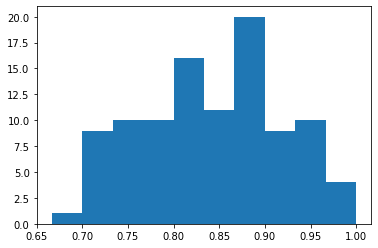

In [643]:
plt.hist(np.reshape(results, (1, -1))[0], bins=10)
plt.show()